In [36]:
import matplotlib.pyplot as plt

def plot_class_distribution_with_percentage(class_distribution, title="Class Distribution with Percentages", save_path=None):
    """
    Plot the class distribution as a bar chart with percentages annotated on each bar.
    
    Args:
        class_distribution (DataFrame): A DataFrame of class counts.
        title (str): The title of the plot.
        save_path (str): Optional path to save the plot.
    """
    classes = list(class_distribution.index)
    counts = list(class_distribution['count'])
    
    total_samples = sum(counts)  # Total samples in the dataset
    percentages = [count / total_samples * 100 for count in counts]  # Calculate percentage for each class
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(classes, counts, color='skyblue')
    
    # Annotate each bar with percentage
    for bar, percentage in zip(bars, percentages):
        height = bar.get_height()
        if percentage >= 0.25:
            plt.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)
    
    plt.xlabel("Class", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(classes, rotation=90)  # Rotate x-axis labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    if save_path:
        plt.savefig(save_path)
        print(f"Plot saved to {save_path}")
    else:
        plt.show()

,land_cover,count
1,Cotton,2754
2,Rice,1
3,Sorghum,206
4,Sweet Corn,1
5,Barley,489


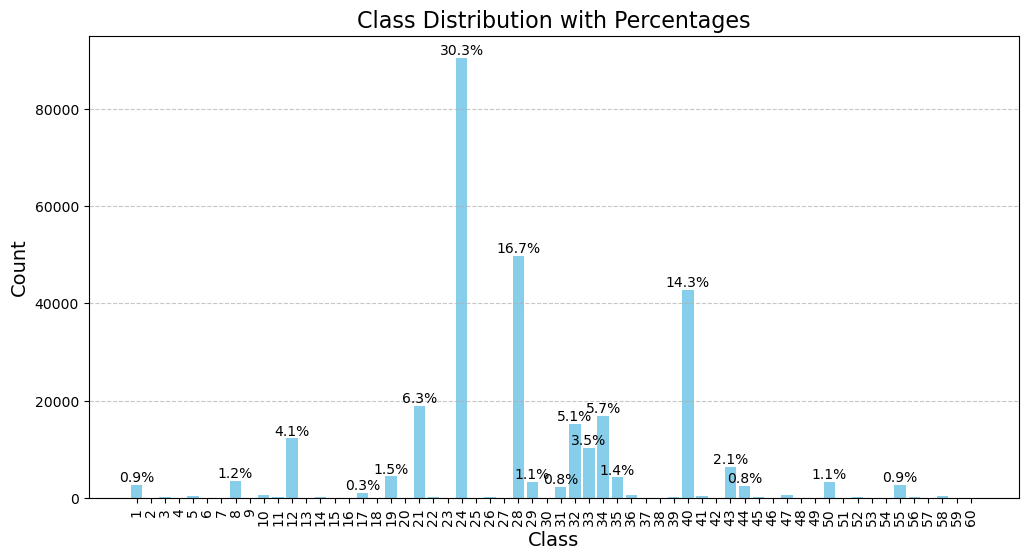

In [39]:
import pandas as pd

with open('data/land_cover_representation/metadata.csv') as f:
    metadata = pd.read_csv(f)

classes = pd.unique(metadata['land_cover'])
class_distribution = pd.Series(metadata['land_cover']).value_counts()
classes_dict = pd.Series.to_dict(class_distribution)

class_doc = dict(zip(pd.unique(metadata['y']), pd.unique(metadata['land_cover'])))
class_doc = dict(sorted(class_doc.items()))

class_count = {}
for i in range(1, 61):
    class_count[i] = (class_doc[i], classes_dict[class_doc[i]])

count_df = pd.DataFrame.from_dict(class_count, orient='index', columns=['land_cover', 'count'])

display(count_df.head())

plot_class_distribution_with_percentage(count_df)

,land_cover,count
0,Cotton,2754
1,Winter Wheat,3485
2,Alfalfa,12274
3,Onions,1017
4,Tomatoes,4443
5,Fallow/Idle Cropland,18897
6,Grapes,90484
7,Almonds,49792
8,Walnuts,3299
9,Open Water,2320


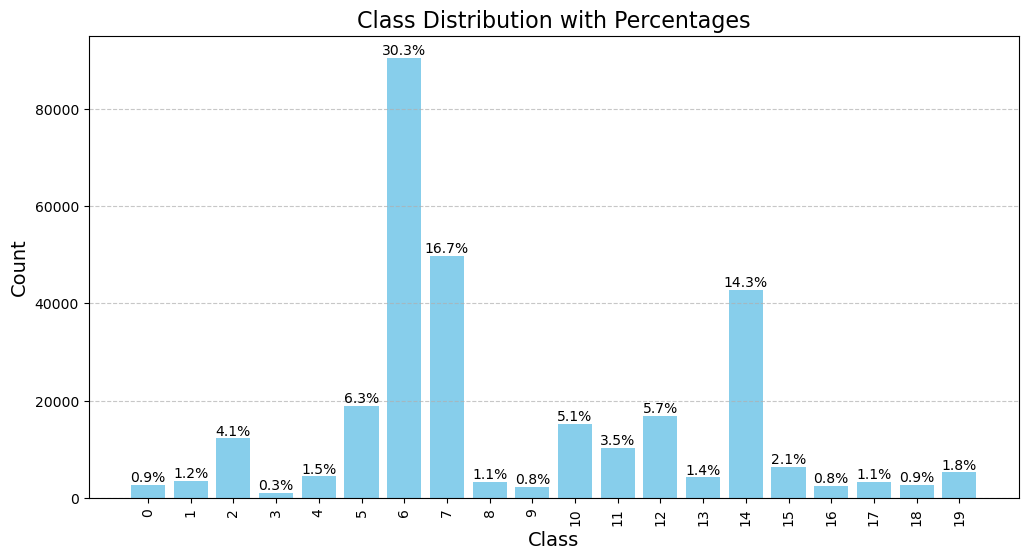

In [48]:
min_count = 1000

low_counts_df = count_df[count_df['count'] < min_count]
new_count_df = count_df[count_df['count'] >= min_count].reset_index(drop=True)
new_count_df.loc[len(new_count_df)] = ['Other', sum(low_counts_df['count'])]
display(new_count_df)

plot_class_distribution_with_percentage(new_count_df)